# <center><h3>Complex Network Project</h3></center>

In [54]:
import networkx as nx
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch

In [55]:
G = nx.DiGraph()

department_labels = 'email-Eu-core-department-labels.txt'
email = 'email-Eu-core.txt'

department_labels_csv = pd.read_csv(department_labels, sep=',')
email_csv = pd.read_csv(email, sep=',')

department_labels_csv.head()
email_csv.head()

,u,v
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


In [56]:
i = 0
dep_color = []
for name in mcolors.CSS4_COLORS:
    i+=1
    if(i == 43):
        break
    dep_color.append(name)
# print(len(dep_color))
# for i in dep_color:
#     print(i)

color_map = []
for i in range(len(department_labels_csv)):
    color_map.append(dep_color[department_labels_csv['dep'][i]])
    # print(color_map[i])

print((len(color_map)))


1005


In [57]:
# G.add_nodes_from()
G.add_edges_from(email_csv.to_numpy())


In [58]:
# nx.draw(G, node_color=color_map)
# plt.show()

In [59]:
H = nx.DiGraph()

email_short = 'email-Eu-core.txt'

email_short_csv = pd.read_csv(email_short, sep=',')

email_short_csv.head()

,u,v
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


In [60]:
# G.add_nodes_from()
# H.add_edges_from(email_short_csv.to_numpy())
# nx.draw(H, node_color=color_map)
# plt.show()

In [61]:
undirected_G = nx.Graph()

undirected_G.add_edges_from(email_csv.to_numpy())
undirected_G.remove_edges_from(nx.selfloop_edges(undirected_G))
undirected_G.remove_nodes_from(list(nx.isolates(undirected_G)))
# nx.draw(undirected_G)
# plt.show()

# Degree Distribution

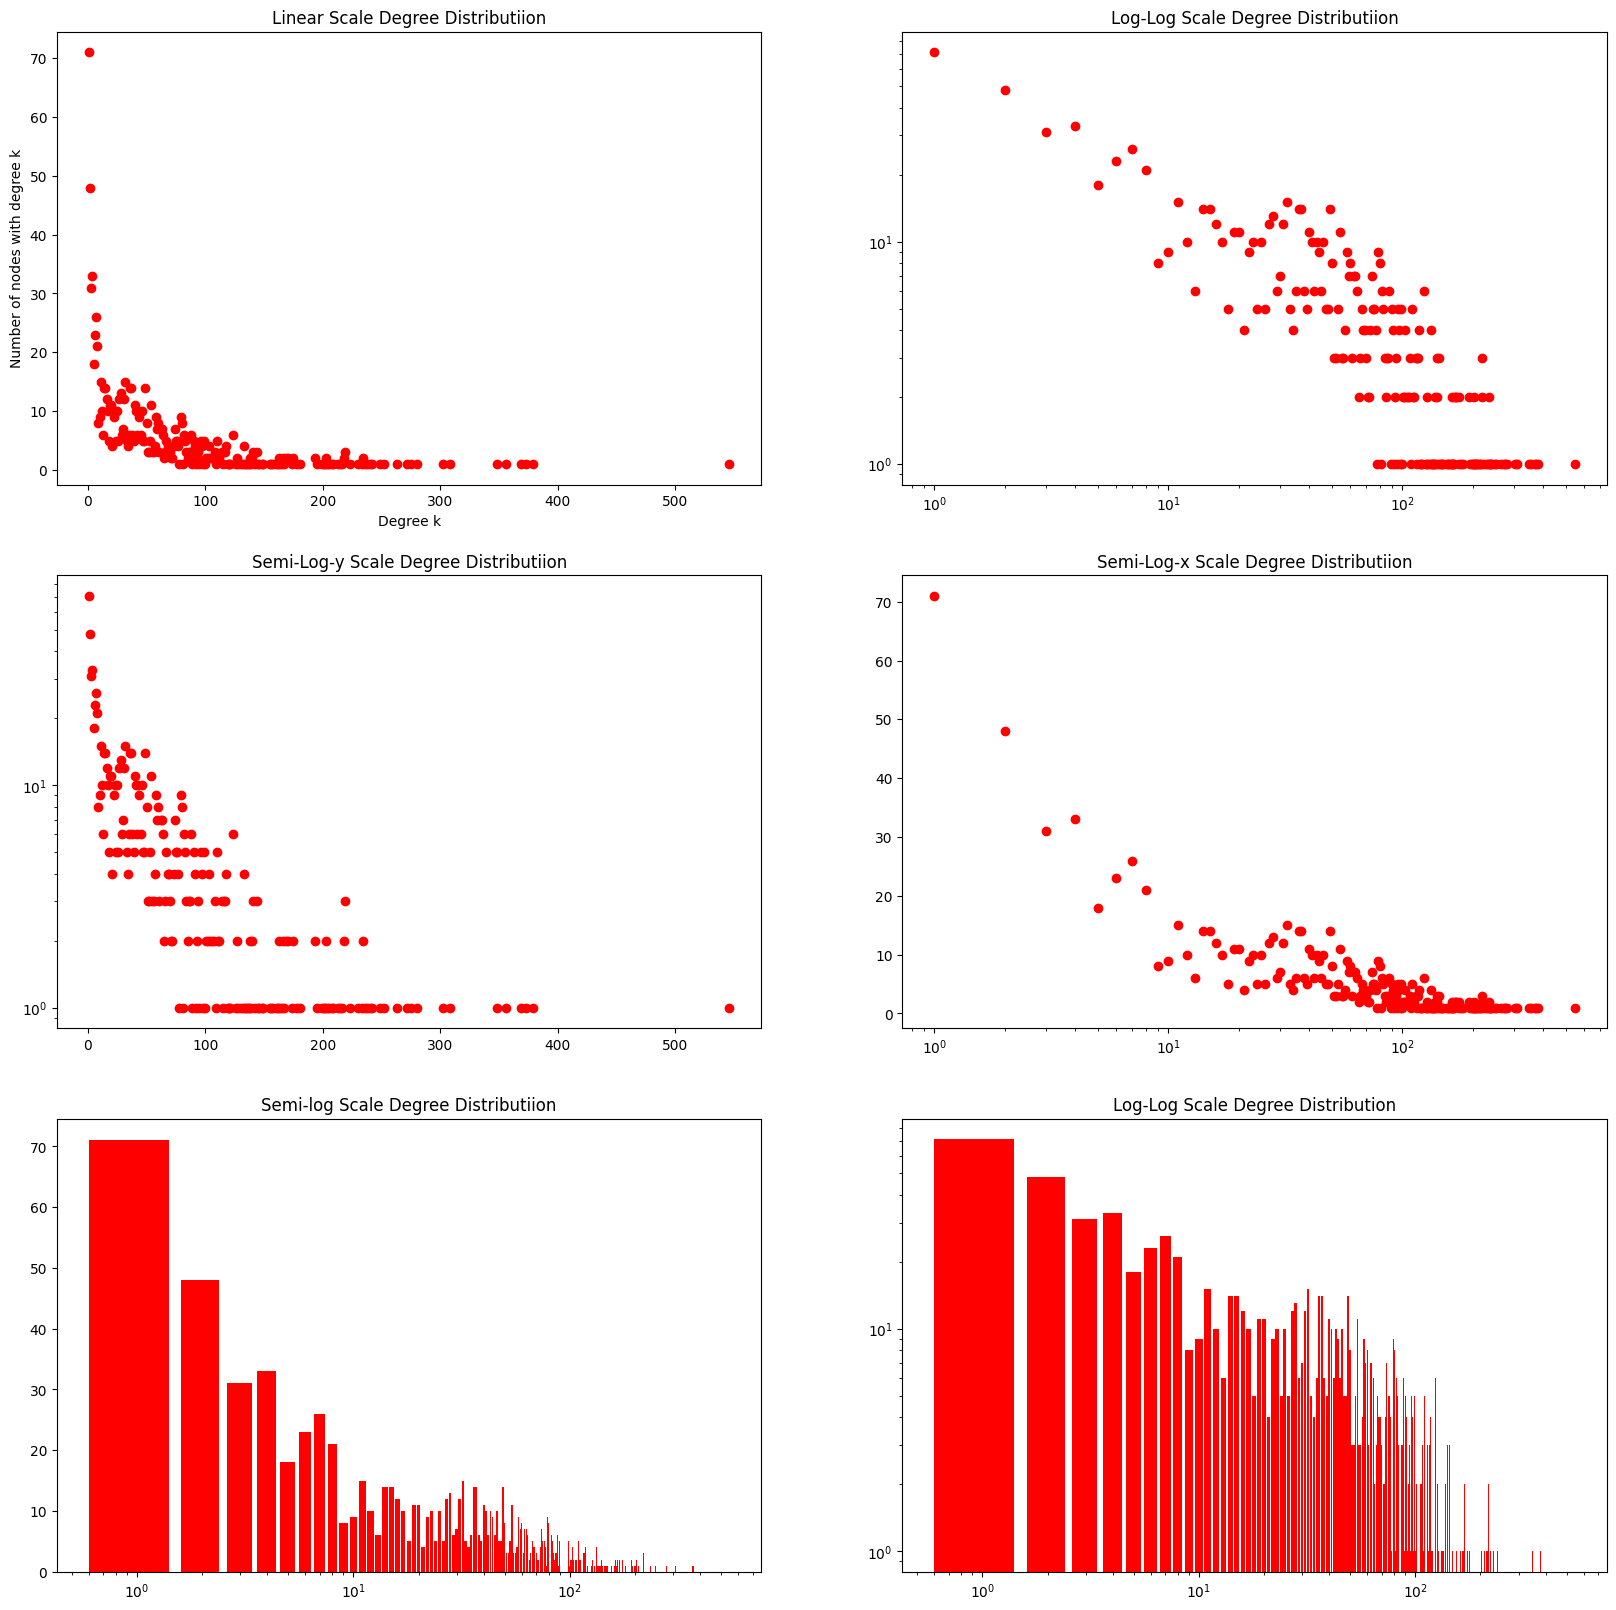

In [62]:
degree = np.array(G.degree)[:,1]
unique_elements, counts_elements = np.unique(degree, return_counts=True)


fig, ax = plt.subplots(3, 2, figsize=(20, 20))
ax[0, 0].plot(unique_elements, counts_elements, 'ro')
ax[0, 0].set_title("Linear Scale Degree Distributiion")
ax[0, 0].set_xlabel("Degree k")
ax[0, 0].set_ylabel("Number of nodes with degree k")


ax[0, 1].loglog(unique_elements, counts_elements, 'ro')
ax[0, 1].set_title("Log-Log Scale Degree Distributiion")

ax[1, 0].semilogy(unique_elements, counts_elements, 'ro')
ax[1, 0].set_title("Semi-Log-y Scale Degree Distributiion")

ax[1, 1].semilogx(unique_elements, counts_elements, 'ro')
ax[1, 1].set_title("Semi-Log-x Scale Degree Distributiion")

ax[2, 0].bar(unique_elements, counts_elements, color='r')
ax[2, 0].set_xscale('log')
ax[2, 0].set_title("Semi-log Scale Degree Distributiion")

ax[2, 1].bar(unique_elements, counts_elements, color='r', log=True)
ax[2, 1].set_xscale('log')
ax[2, 1].set_title("Log-Log Scale Degree Distribution")
plt.show()


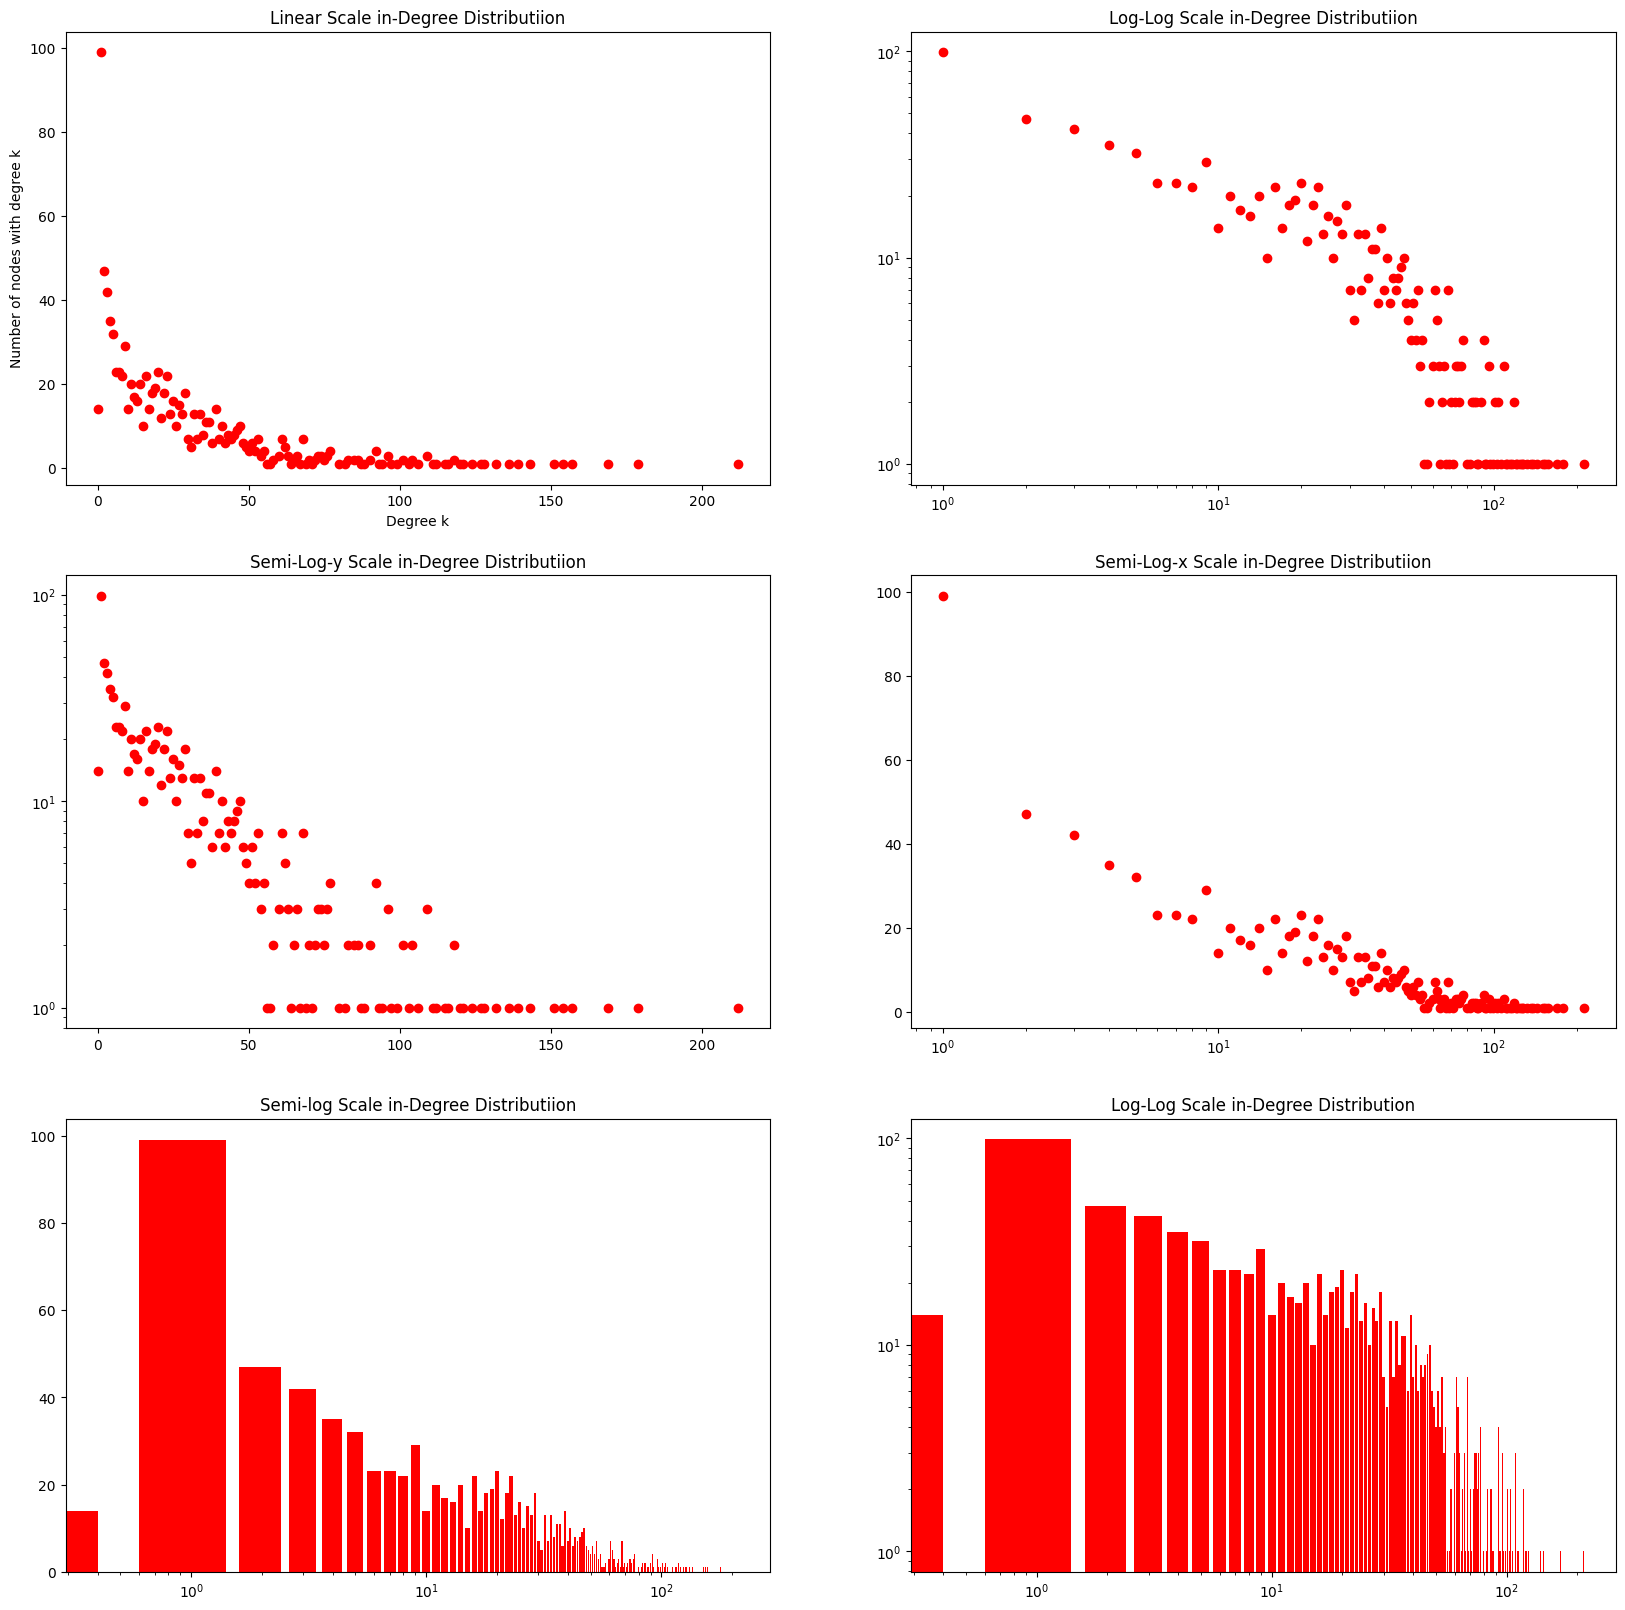

In [63]:
degree = np.array(G.in_degree)[:,1]
unique_elements, counts_elements = np.unique(degree, return_counts=True)
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
ax[0, 0].plot(unique_elements, counts_elements, 'ro')
ax[0, 0].set_title("Linear Scale in-Degree Distributiion")
ax[0, 0].set_xlabel("Degree k")
ax[0, 0].set_ylabel("Number of nodes with degree k")


ax[0, 1].loglog(unique_elements, counts_elements, 'ro')
ax[0, 1].set_title("Log-Log Scale in-Degree Distributiion")

ax[1, 0].semilogy(unique_elements, counts_elements, 'ro')
ax[1, 0].set_title("Semi-Log-y Scale in-Degree Distributiion")

ax[1, 1].semilogx(unique_elements, counts_elements, 'ro')
ax[1, 1].set_title("Semi-Log-x Scale in-Degree Distributiion")

ax[2, 0].bar(unique_elements, counts_elements, color='r')
ax[2, 0].set_xscale('log')
ax[2, 0].set_title("Semi-log Scale in-Degree Distributiion")

ax[2, 1].bar(unique_elements, counts_elements, color='r', log=True)
ax[2, 1].set_xscale('log')
ax[2, 1].set_title("Log-Log Scale in-Degree Distribution")
plt.show()

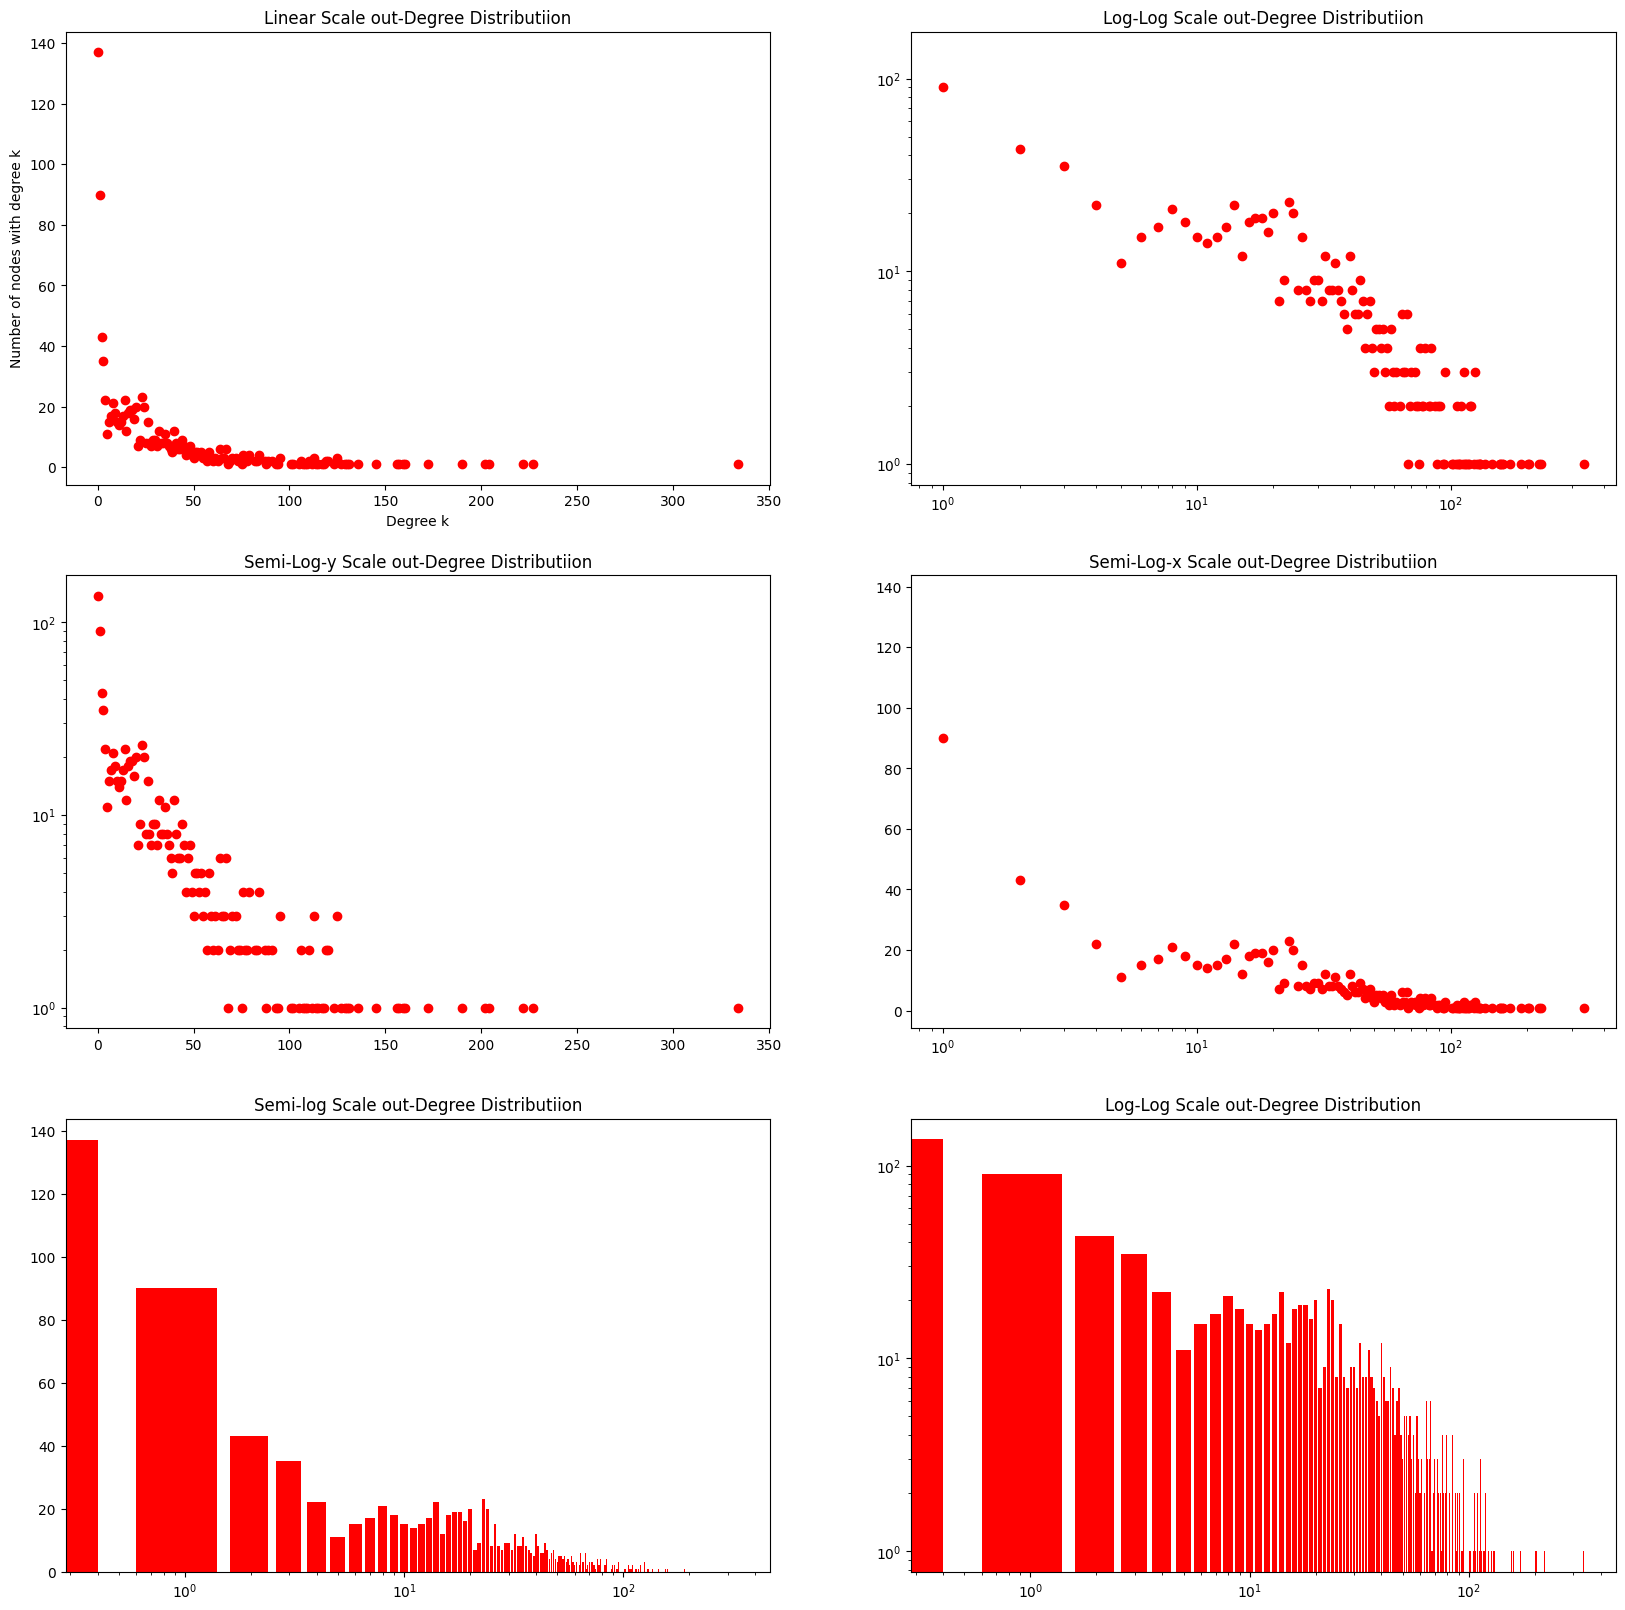

In [64]:
degree = np.array(G.out_degree)[:,1]
unique_elements, counts_elements = np.unique(degree, return_counts=True)

fig, ax = plt.subplots(3, 2, figsize=(20, 20))
ax[0, 0].plot(unique_elements, counts_elements, 'ro')
ax[0, 0].set_title("Linear Scale out-Degree Distributiion")
ax[0, 0].set_xlabel("Degree k")
ax[0, 0].set_ylabel("Number of nodes with degree k")


ax[0, 1].loglog(unique_elements, counts_elements, 'ro')
ax[0, 1].set_title("Log-Log Scale out-Degree Distributiion")

ax[1, 0].semilogy(unique_elements, counts_elements, 'ro')
ax[1, 0].set_title("Semi-Log-y Scale out-Degree Distributiion")

ax[1, 1].semilogx(unique_elements, counts_elements, 'ro')
ax[1, 1].set_title("Semi-Log-x Scale out-Degree Distributiion")

ax[2, 0].bar(unique_elements, counts_elements, color='r')
ax[2, 0].set_xscale('log')
ax[2, 0].set_title("Semi-log Scale out-Degree Distributiion")

ax[2, 1].bar(unique_elements, counts_elements, color='r', log=True)
ax[2, 1].set_xscale('log')
ax[2, 1].set_title("Log-Log Scale out-Degree Distribution")
plt.show()

In [65]:
# from community import community_louvain
# import matplotlib.cm as cm
# import matplotlib.pyplot as plt
# import networkx as nx

# part_dict = dict(department_labels_csv.values.tolist())

# # compute the best partition
# partition = community_louvain.best_partition(undirected_G, partition = part_dict)

# # draw the graph
# pos = nx.spring_layout(undirected_G)
# # color the nodes according to their partition
# cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
# nx.draw_networkx_nodes(undirected_G, pos, partition.keys(), node_size=40,
#                        cmap=cmap, node_color=list(partition.values()))
# nx.draw_networkx_edges(undirected_G, pos, alpha=0.5)
# plt.show()

In [66]:
# print((partition))
# print(max(partition. values()))
# print(min(partition. values()))

# Newman

In [67]:
def newmanAlgo(oldgraph, num_iter = 10, max_components = 42):
    graph = oldgraph.copy()
    edge_betweenness = nx.edge_betweenness_centrality(graph).items()

    sorted(edge_betweenness, key=lambda pair: -pair[1])

    betweenness = [pair[1] for pair in edge_betweenness]
    mean_betweenness = np.mean(betweenness)
    median_betweenness = np.median(betweenness)
    max_betweenness = np.max(betweenness)
    min_betweenness = np.min(betweenness)

    print("Mean betweenness: ", mean_betweenness)
    print("Median betweenness: ", median_betweenness)
    print("Max betweenness: ", max_betweenness)
    print("Min betweenness: ", min_betweenness)

    x = num_iter//10
    for i in range(num_iter):
        edge_betweenness = sorted(nx.edge_betweenness_centrality(graph).items(), key=lambda pair: -pair[1])
        
        edge_to_delete = edge_betweenness[0][0]
        
        graph.remove_edge(*edge_to_delete)
        print('Step %s\nEdge %s Deleted'%(i, edge_to_delete),end=', ')
        print('Max Edge Betweenness: ', edge_betweenness[0][1], end=', ')
        mean_betweenness1 = np.mean([pair[1] for pair in edge_betweenness])
        print('Mean Edge Betweenness: ', mean_betweenness1, end=', ')
        if(mean_betweenness1 < 0.9*mean_betweenness):
            break
        
        num_components = len(list(nx.connected_components(graph)))
        print("number of components: ",num_components)
        if(num_components == max_components):
            break
        # if(i%x == 0):
        #     nx.draw(graph, with_labels=True, node_color='r')
        #     plt.title('Step %s\nEdge %s Deleted'%(i, edge_to_delete), fontsize=20)
            
            # plt.show()
    return graph, num_components

In [68]:
new_undirected_G_newman, num_comp_1 = newmanAlgo(undirected_G, 100, 42)

Mean betweenness:  0.0001610392072221406
Median betweenness:  9.507376644472446e-05
Max betweenness:  0.004392498491556038
Min betweenness:  2.05928686895728e-06
Step 0
Edge (414, 443) Deleted, Max Edge Betweenness:  0.004392498491556038, Mean Edge Betweenness:  0.00016103920722214057, number of components:  1
Step 1
Edge (370, 414) Deleted, Max Edge Betweenness:  0.004729379323077292, Mean Edge Betweenness:  0.00016112358906807331, number of components:  1
Step 2
Edge (86, 415) Deleted, Max Edge Betweenness:  0.004982937135931306, Mean Edge Betweenness:  0.00016124567475556782, number of components:  1
Step 3
Edge (5, 697) Deleted, Max Edge Betweenness:  0.006160433065043993, Mean Edge Betweenness:  0.00016144175662603742, number of components:  1
Step 4
Edge (414, 645) Deleted, Max Edge Betweenness:  0.003430969807234877, Mean Edge Betweenness:  0.00016165042892470744, number of components:  1
Step 5
Edge (414, 479) Deleted, Max Edge Betweenness:  0.0048674009424476035, Mean Edge Bet

In [ ]:
components = nx.connected_components(new_undirected_G_newman)
components = list(components)
print(len(components))

In [ ]:

# from networkx.algorithms.community.centrality import girvan_newman
# comp = girvan_newman(undirected_G)

# node_groups = []
# for com in next(comp):
#     node_groups.append(list(com))

# print(node_groups)

# Louvain Algorithn

[{0, 4, 5, 7, 9}, {1, 2, 3, 6, 8}]

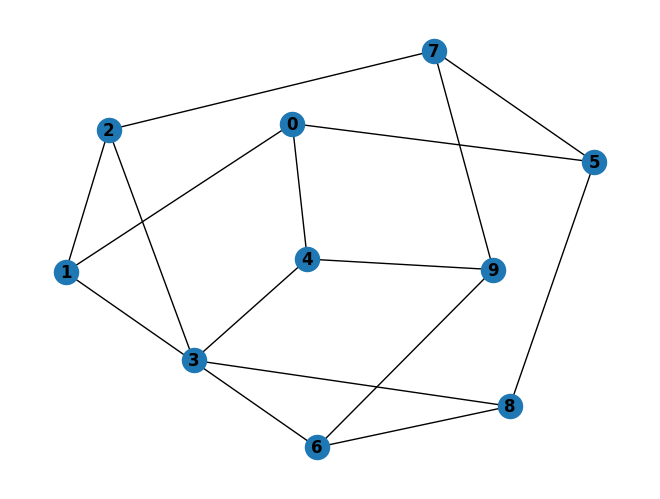

In [ ]:
import networkx as nx
G = nx.petersen_graph()
nx.draw(G, with_labels=True, font_weight='bold')
nx.community.louvain_communities(G, seed=123)
# [{0, 4, 5, 7, 9}, {1, 2, 3, 6, 8}]